In [ ]:
import re
import pandas as pd
import numpy as np
import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle

In [ ]:
import pandas as pd

# Import Data
df = pd.read_csv("C:/Kuliah/Bangkit/Capstone/Dataset/Tambahan/play_stopword.csv", delimiter=';')

# Select specific columns using double square brackets
df = df[['at',"title", "label"]]

# Cut the last 10 characters in each cell of the specified column
df['at'] = df['at'].apply(lambda x: x[:-9] if len(x) > 10 else '')

df

at                                              title     label
0      2023-11-18  ribet mengganti alamat surel aktif buka bantua...  Negative
1      2023-11-14  kecewa aplikasi , bintang , udah x transaksi p...  Negative
2      2023-11-14  daftar harga langsung token listrik harga tota...  Negative
3      2023-11-06  jagan beli pulsa bualapak .. topup .. transfer...  Negative
4      2023-11-12  pembelian dibatalkan , keterangannya pembeli y...  Negative
...           ...                                                ...       ...
20937  2021-06-08  aplikasi udah bermanfaat bangett . please tamb...  Positive
20938  2019-06-17  membantu , tolong kadang no plat aplikasi asli...  Positive
20939  2019-07-06  halo admin . apk membantu , foreigner yg jelaj...  Positive
20940  2020-10-16  pelanggan yth order gofood yg pesan , notifika...  Positive
20941  2019-02-18  ship membantu . raport nilai pelit nggak tip ,...  Positive

[20942 rows x 3 columns]

In [ ]:
# Assuming 'label' is the column containing 'positive' and 'negative'
label_counts = df['label'].value_counts()

# Display the counts
print(label_counts)


label
Negative    10471
Positive    10471
Name: count, dtype: int64


In [ ]:
reviews = df['title'].values
labels = df['label'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [ ]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels)

In [ ]:
#BUAT TEST AJA JGN DI RUN

vocab_size = 15000
oov_tok = ''
embedding_dim = 50
max_length = 200
padding_type = 'post'
trunc_type = 'post'

# Tokenize sentences
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# Convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, truncating=trunc_type, maxlen=max_length)

# Convert test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding=padding_type, truncating=trunc_type, maxlen=max_length)

# Perform PCA to estimate embedding dimension
#embedding_dim_candidate = 50  # You can start with a value and adjust as needed
pca = PCA(n_components=embedding_dim)
pca_result = pca.fit_transform(train_padded)

# Plot the explained variance ratio to help choose an appropriate dimension
plt.plot(range(1, embedding_dim + 1), pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()


NameError: name 'PCA' is not defined

In [ ]:
vocab_size = 15000 # choose based on statistics
oov_tok = '<OOV>'
embedding_dim = 50
max_length = 200 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [ ]:
# model initialization
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 50)           750000    
                                                                 
 bidirectional (Bidirection  (None, 128)               58880     
 al)                                                             
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 812001 (3.10 MB)
Trainable params: 812001 (3.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
num_epochs = 5
history = model.fit(train_padded, train_labels,
                    epochs=num_epochs, verbose=1,
                    validation_split=0.1)

Epoch 1/5


442/442 [==============================] - 31s 64ms/step - loss: 0.2751 - accuracy: 0.8807 - val_loss: 0.2130 - val_accuracy: 0.9185
Epoch 2/5
442/442 [==============================] - 28s 64ms/step - loss: 0.1347 - accuracy: 0.9513 - val_loss: 0.2288 - val_accuracy: 0.9166
Epoch 3/5
442/442 [==============================] - 31s 70ms/step - loss: 0.0859 - accuracy: 0.9712 - val_loss: 0.2595 - val_accuracy: 0.9211
Epoch 4/5
442/442 [==============================] - 31s 70ms/step - loss: 0.0595 - accuracy: 0.9802 - val_loss: 0.3125 - val_accuracy: 0.9179
Epoch 5/5
442/442 [==============================] - 28s 63ms/step - loss: 0.0427 - accuracy: 0.9854 - val_loss: 0.3489 - val_accuracy: 0.9185


In [ ]:
prediction = model.predict(test_padded)
# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred_labels))

164/164 [==============================] - 3s 17ms/step
Accuracy of prediction on test set :  0.9153934300993124


In [ ]:
# Assuming you have already initialized 'tokenizer' and 'max_length'

# Test sentence
test_sentence = "aplikasi sering error bikin emosi aja"

# Convert the test sentence to a sequence
test_sequence = tokenizer.texts_to_sequences([test_sentence])

# Pad the sequence
padded_test = pad_sequences(test_sequence, padding='post', maxlen=max_length)

# Get the label based on probability 1 if p >= 0.5 else 0
prediction = model.predict(padded_test)

# Convert probability to label
pred_label = 1 if prediction >= 0.5 else 0

# Display the result
print("Test sentence: ", test_sentence)
print("Predicted sentiment: ", "Positive" if pred_label == 1 else "Negative")


1/1 [==============================] - 0s 27ms/step
Test sentence:  aplikasi sering error bikin emosi aja
Predicted sentiment:  Negative


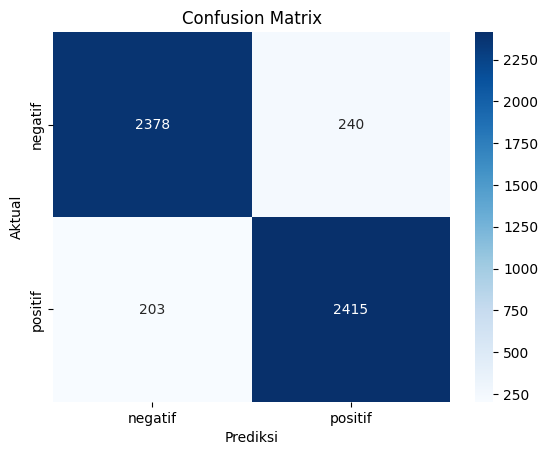

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(test_labels, pred_labels)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['negatif', 'positif'], yticklabels=['negatif', 'positif'])
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

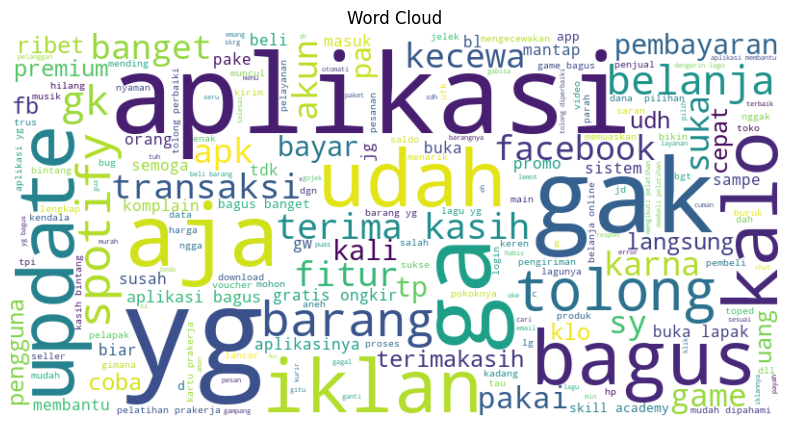

In [ ]:
from wordcloud import WordCloud

text_data = ' '.join(df['title'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords='spotify').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

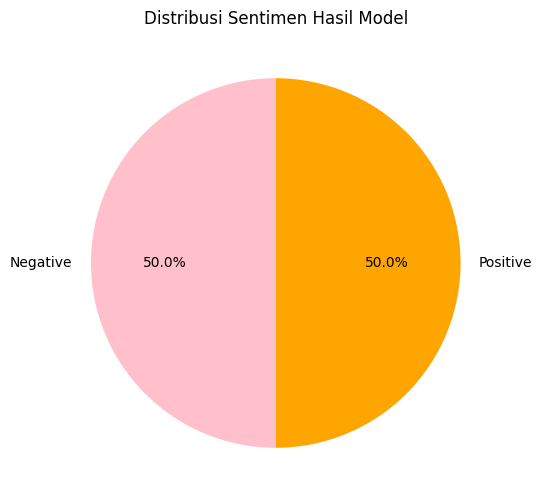

In [ ]:
count_sentiment = df['label'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(count_sentiment, labels=count_sentiment.index, autopct='%1.1f%%', colors=['pink', 'orange'], startangle=90)
plt.title('Distribusi Sentimen Hasil Model')
plt.show()

In [ ]:
# Convert 'at' column to datetime if it's not already in datetime format
df['at'] = pd.to_datetime(df['at'])

# Create a new column 'positive' with 1 for positive values and 0 for others
df['positive'] = (df['label'] == 'positive').astype(int)

# Create a new column 'negative' with 1 for negative values and 0 for others
df['negative'] = (df['label'] == 'negative').astype(int)

# Assuming that 'label' can have values other than 'positive' and 'negative'
# You can set a default value (e.g., 0) for cases where 'label' is neither 'positive' nor 'negative'
df['positive'] = df['positive'].where(df['label'].isin(['positive', 'negative']), 0)
df['negative'] = df['negative'].where(df['label'].isin(['positive', 'negative']), 0)

# Optionally, you can set the 'at' column as the index for a time series
df.set_index('at', inplace=True)

KeyError: 'at'

NameError: name 'at' is not defined

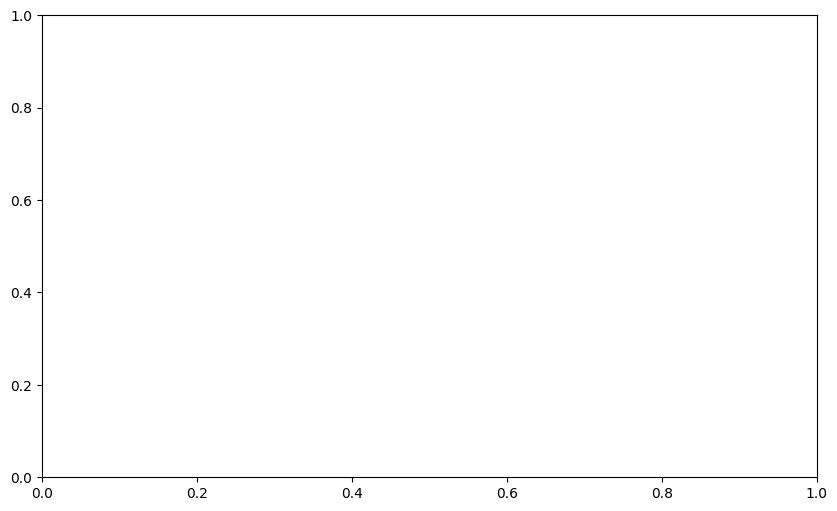

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot positive values in green
ax.plot(at, label, label='Positive', color='green')

# Plot negative values in red
ax.plot(at, label, label='Negative', color='red')

# Customize the plot
ax.set_title('Positive and Negative Trends in Time Series')
ax.set_xlabel('Time')
ax.set_ylabel('Values')
ax.legend()

# Show the plot
plt.show()

In [ ]:
# Assuming you have already initialized 'tokenizer' and 'max_length'

# Load the data
df = pd.read_csv('[LABELLED]_LinkedIn.csv', sep=',')
df = df[["text_data"]]

# Convert to a sequence
sequences = tokenizer.texts_to_sequences(df["text_data"])

# Pad the sequence
padded = pad_sequences(sequences, padding='post', maxlen=max_length)

# Get labels based on probability 1 if p >= 0.5 else 0
prediction = model.predict(padded)

# Convert probabilities to labels
pred_labels = [1 if p >= 0.5 else 0 for p in prediction]

# Create a new DataFrame with the original text data and predicted sentiments
result_df = pd.DataFrame({"text_data": df["text_data"], "predicted_sentiment": pred_labels})

# Display predictions
for i in range(len(result_df)):
    print(result_df["text_data"].iloc[i])
    print("Predicted sentiment: ", "Positive" if result_df["predicted_sentiment"].iloc[i] == 1 else "Negative")
    print()

# Save the results to a new CSV file
result_df.to_csv('predicted_sentiments.csv', index=False)
